# Importing libraries and reading dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("netflix_titles.csv")

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploratory data analysis (EDA)

In [27]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [25]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7468,s7469,TV Show,Miss Rose,NaN,"Roy Chiu, Megan Lai, Paul Hsu, Tia Lee, Chunya...",Taiwan,"August 1, 2016",2015,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Resolving to get married soon, hardworking Si-..."


In [26]:
df.shape

(8807, 12)

In [30]:
#get datatypes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [31]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [32]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

# Handling missing data

In [37]:
#Handling missing data
df.dropna(inplace = True)


In [62]:
duplicate_rows = df[df.duplicated()]

# Check if there are any duplicate rows
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [63]:
# create a copy table
df_copy = df.copy()

In [65]:
# copy new 'title' column with lower case string
df['title_lower'] = df['title'].str.lower()

# sorting title, release year by ascending
df = df.sort_values(by=['show_id', 'title','release_year'], ascending=[True, True, True])

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_lower
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,the starling
462,s1000,Movie,Stowaway,Joe Penna,"Anna Kendrick, Toni Collette, Daniel Dae Kim, ...","Germany, United States","April 22, 2021",2021,TV-MA,116 min,"Dramas, International Movies, Thrillers",A three-person crew on a mission to Mars faces...,stowaway
463,s1002,Movie,Oloibiri,Curtis Graham,"Olu Jacobs, Richard Mofe-Damijo, William R. Mo...","Canada, Nigeria, United States","April 21, 2021",2015,TV-14,86 min,"Dramas, International Movies, Thrillers","After drilling depletes a small village, a cor...",oloibiri
464,s1003,Movie,Tell Me When,Gerardo Gatica,"Jesús Zavala, Ximena Romo, Verónica Castro, Jo...",Mexico,"April 21, 2021",2021,TV-MA,97 min,"Comedies, International Movies",Workaholic Will puts his humdrum life in LA on...,tell me when
465,s1014,Movie,Miss Sloane,John Madden,"Jessica Chastain, Mark Strong, Gugu Mbatha-Raw...","France, United States, United Kingdom, Canada","April 19, 2021",2016,R,132 min,Thrillers,A tenacious Capitol Hill lobbyist with a well-...,miss sloane
...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,s991,Movie,Niyazi Gül Dörtnala,Hakan Algül,"Ata Demirer, Demet Akbağ, Şebnem Bozoklu, Leve...",Turkey,"April 23, 2021",2015,TV-MA,102 min,"Comedies, International Movies",Seeking the formula behind a magical elixir be...,niyazi gül dörtnala
458,s992,Movie,One Like It,Marwan Nabil,"Riham Abdel Ghafour, Mohammed Aly Rizk, Hazem ...",Egypt,"April 23, 2021",2020,TV-G,15 min,"Dramas, Independent Movies, International Movies",This short film follows a day in the life of a...,one like it
459,s995,Movie,This Lady Called Life,Kayode Kasum,"Bisola Aiyeola, Efa Iwara, Molawa Onajobi, Tin...",Nigeria,"April 23, 2021",2020,TV-14,120 min,"Dramas, International Movies, Romantic Movies","Abandoned by her family, young single mother A...",this lady called life
460,s996,Movie,Vizontele,"Yılmaz Erdoğan, Ömer Faruk Sorak","Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, Ce...",Turkey,"April 23, 2021",2001,TV-MA,106 min,"Comedies, Dramas, International Movies","In 1974, a rural town in Anatolia gets its fir...",vizontele


In [66]:
dup_title = df.groupby(['type', 'title_lower','release_year']).size().reset_index(name='count')
dup_title = dup_title[dup_title['count'] > 1]

In [67]:
# deleted duplicate title name by lower case title
df.drop_duplicates(subset=['type', 'title_lower', 'release_year'], keep='first', inplace=True)

In [68]:
df.fillna('unknown', inplace=True)
print(df.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
title_lower     0
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_42876\1409370864.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_director['director'], order=filtered_director['director'].value_counts().index[:10], palette='pastel')


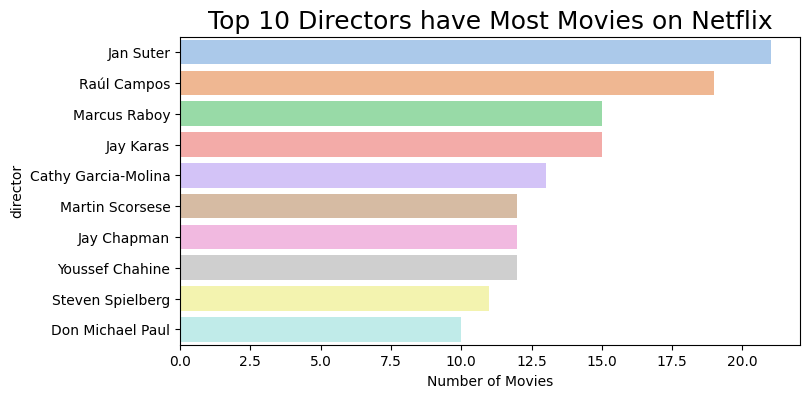

In [75]:
#assign a new director listing 
df_director = df[['show_id','director','country']].copy()
director_exploded = df_director.copy()


#replace and split comma to explode value in the 'director' column
director_exploded['director'] = director_exploded['director'].str.replace(', ', ',', regex=False)
director_exploded['director'] = director_exploded['director'].str.split(',')

#Explode the 'director' list name into Multiple Rows
director_exploded = director_exploded.explode('director')
director_exploded.reset_index(drop=True, inplace=True)


#filter dicector except 'unknown'
filtered_director = director_exploded[~director_exploded['director'].str.lower().eq('unknown')]



plt.figure(figsize=(8,4))
sns.countplot(y=filtered_director['director'], order=filtered_director['director'].value_counts().index[:10], palette='pastel')
plt.title("Top 10 Directors have Most Movies on Netflix", fontsize= 18)
plt.xlabel("Number of Movies")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_42876\3864011803.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_country['country'], order=filtered_country['country'].value_counts().index[:10], palette='magma')


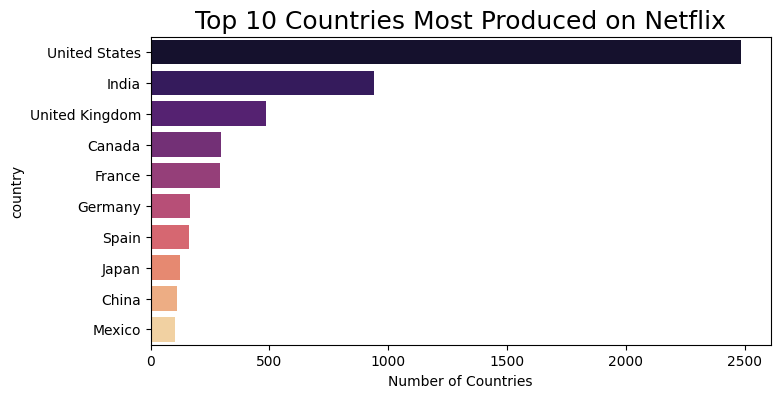

In [76]:
#assign a new country listing
df_country = df[['show_id','country','rating']].copy()
country_exploded = df_country.copy()

#replace and split comma to explode value in the 'country' column
country_exploded['country'] = country_exploded['country'].str.replace(', ', ',', regex=False)
country_exploded['country'] = country_exploded['country'].str.split(',')

#Explode the 'country' list name into Multiple Rows
country_exploded = country_exploded.explode('country')
country_exploded.reset_index(drop=True, inplace=True)


#filter country except 'unknown'
filtered_country = country_exploded[~country_exploded['country'].str.lower().eq('unknown')]


plt.figure(figsize=(8,4))
sns.countplot(y=filtered_country['country'], order=filtered_country['country'].value_counts().index[:10], palette='magma')
plt.title("Top 10 Countries Most Produced on Netflix", fontsize= 18)
plt.xlabel("Number of Countries")
plt.show()

In [78]:
!pip install squarify


[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


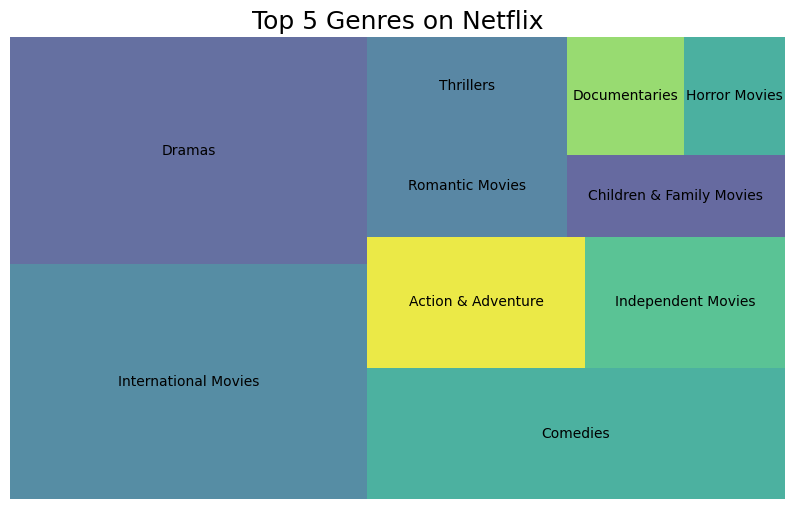

In [84]:
import squarify
def plt_genre(df):
    #assign a new country listing
    df_genre = df[['show_id','type','title','listed_in']].copy()
    
    #split comma to explode value in the 'listed_in' column
    genre_count = df_genre['listed_in'].str.split(', ').explode().value_counts().head(10)

    
    plt.figure(figsize=(10,6))
    squarify.plot(
        sizes= genre_count.values,
        label= genre_count.index,
        alpha= 0.8
    )
    plt.title('Top 5 Genres on Netflix', fontsize=18)
    plt.axis('off')
    plt.show()

plt_genre(df)




# Yearly growth of content in netflix

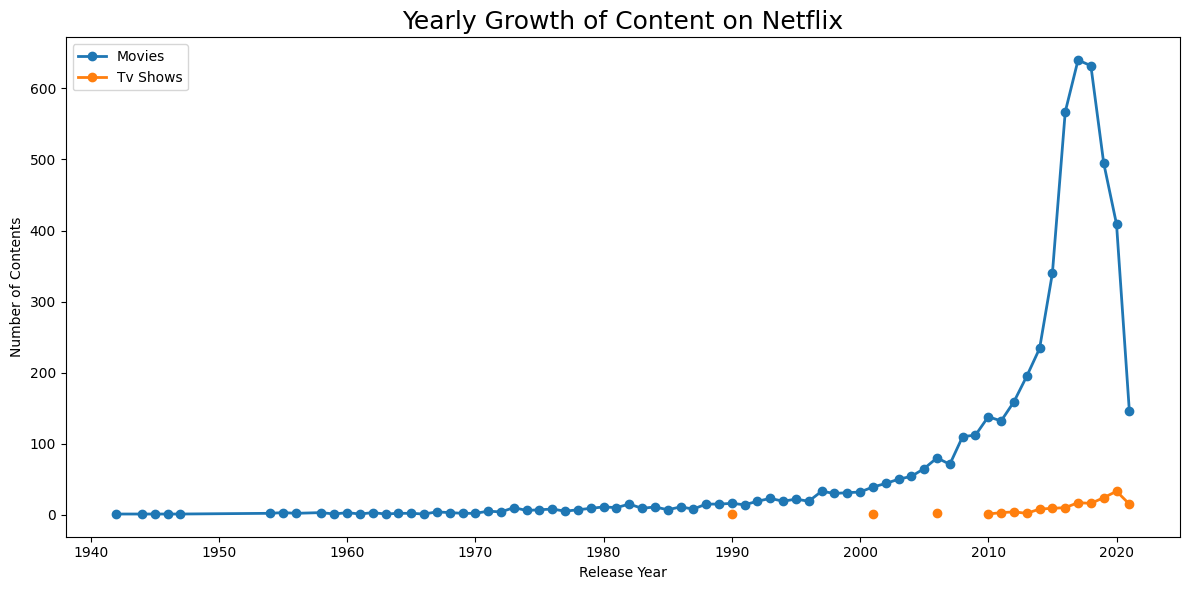

In [85]:
def plt_yearly_trend(df):
    yearly_type_count = df.groupby(['release_year','type']).size().unstack()

    ax= yearly_type_count.plot(
        kind= 'line',
        figsize=(12,6),
        linewidth= 2,
        marker= 'o'
    )

    ax.set_title('Yearly Growth of Content on Netflix', fontsize= 18)
    ax.set_xlabel('Release Year')
    ax.set_ylabel('Number of Contents')
    ax.legend(['Movies','Tv Shows'])
    plt.tight_layout()
    plt.show()

plt_yearly_trend(df)